In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import time
#load the data
data=pd.read_csv('C:/Users/Juan Carlos/Downloads/winequalityN.csv', sep=',', header=0)

In [26]:
print("Dataset Length:: ", len(data) )
print("Dataset Shape:: ", data.shape )

Dataset Length::  6497
Dataset Shape::  (6497, 13)


In [27]:
# Formatting and adding a new column
data['great_wine'] = np.where(data['quality']>=8,1,0)
data = data.drop('quality', axis='columns')

le_type = LabelEncoder()

data = data.dropna()
data['type'] = le_type.fit_transform(data['type'])
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,great_wine
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [28]:
X = data.values[: , 0:11]
Y = data.values[: ,12]

#Using Entropy experiment
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)
start = time.time()
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state = 50, max_depth=4, min_samples_leaf=1)
clf_entropy.fit(X_train, y_train)
end = time.time()

In [29]:
y_pred_en = clf_entropy.predict(X_test)
print("Accuracy is using Entropy", accuracy_score(y_test, y_pred_en)*100)
print("Entropy run time: ", end-start)

Accuracy is using Entropy 97.57607013924704
Entropy run time:  0.009019136428833008


In [30]:
#Using Gini experiment
start = time.time()
clf_gini = DecisionTreeClassifier(criterion='gini', random_state = 0, max_depth=4, min_samples_leaf=1)
clf_gini.fit(X_train, y_train)
end = time.time()
y_pred_gini = clf_gini.predict(X_test)
print("Accuracy is using Gini", accuracy_score(y_test, y_pred_gini)*100)
print("Gini run time: ", end-start)

Accuracy is using Gini 97.47292418772562
Gini run time:  0.008777141571044922


In [10]:
#Before Prunning Tree
y_train_pred = clf_entropy.predict(X_train)
y_test_pred = clf_entropy.predict(X_test)

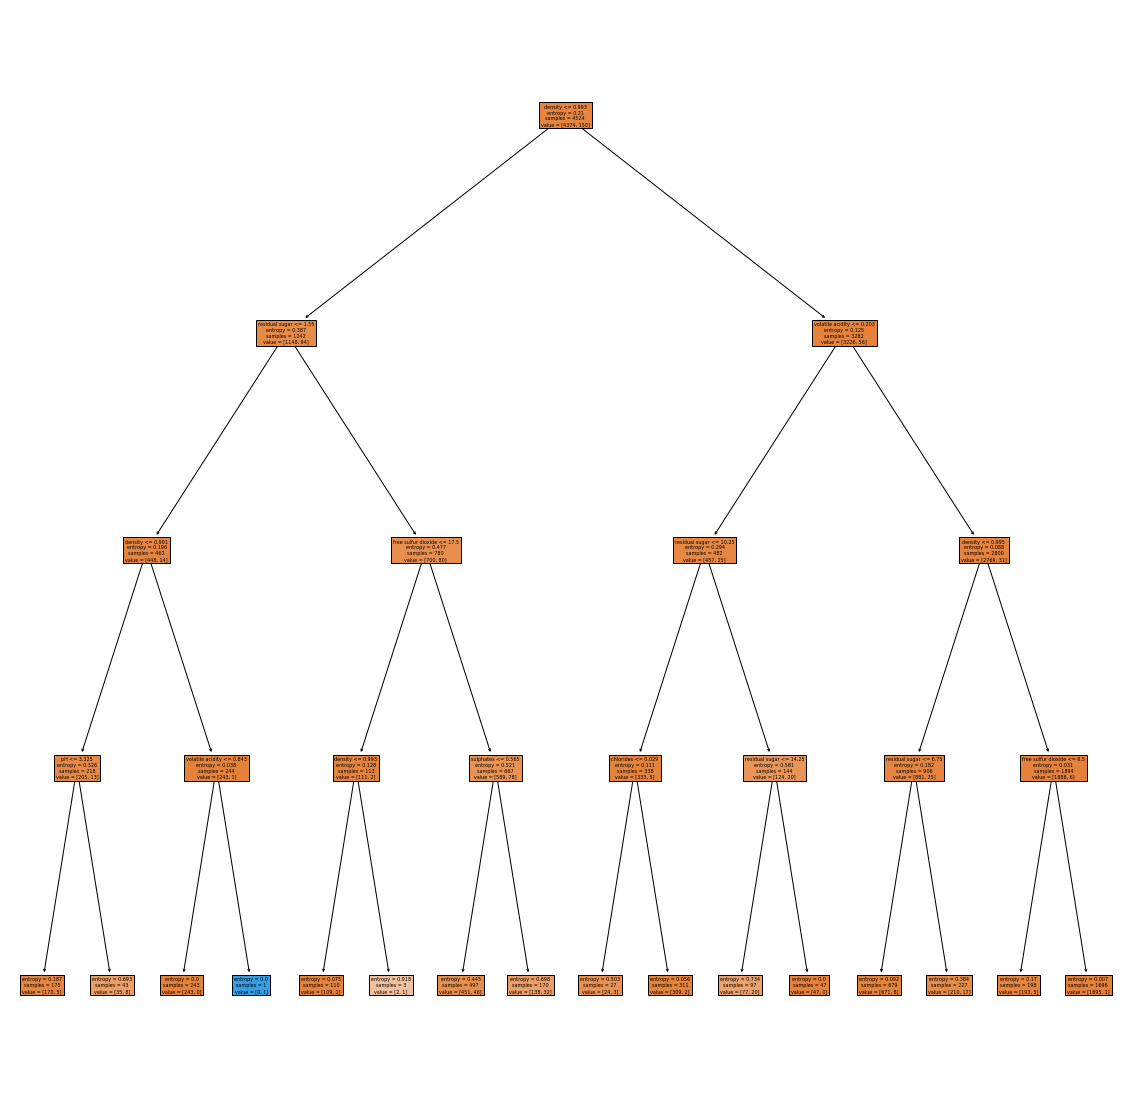

In [11]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['great_wine']
tree.plot_tree(clf_entropy,feature_names=features,filled=True)
plt.show()

In [17]:
#After Prunning Tree
path = clf_entropy.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00077977 0.00144319 0.00164025 0.00187991 0.00207128
 0.00222692 0.00230741 0.00276301 0.00279112 0.00335397 0.00392662
 0.00454826 0.00482271 0.01339198]


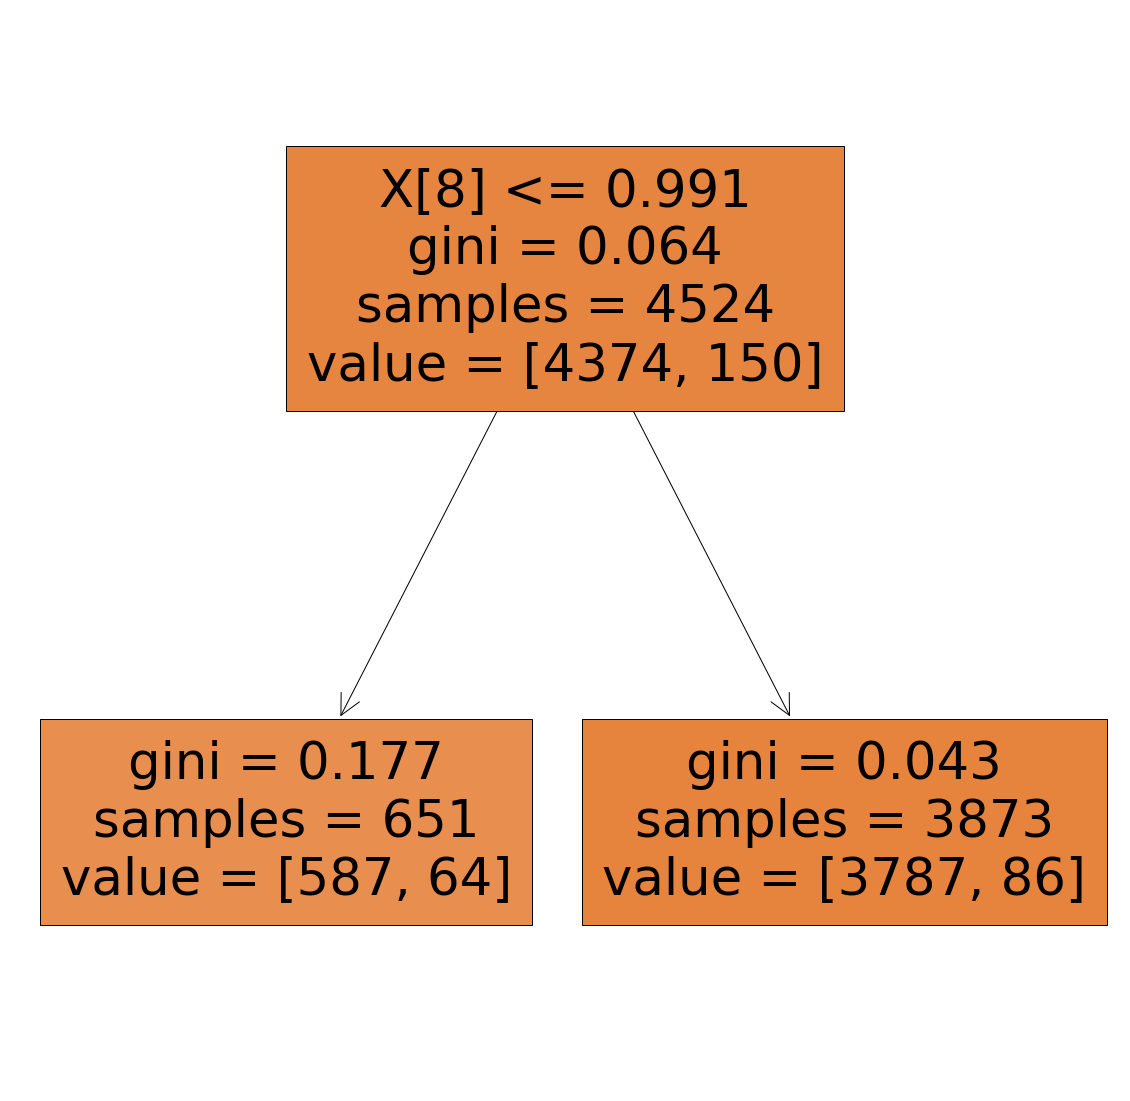

In [18]:

clf_prunning =  DecisionTreeClassifier(max_depth=4, random_state = 0 ,ccp_alpha=0.00077977)
clf_prunning.fit(X_train, y_train)
pred = clf_prunning.predict(X_test)

plt.figure(figsize=(20,20))
features = data.columns
classes = ['great_wine']
tree.plot_tree(clf_prunning,filled=True)
plt.show()

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(16, input_dim=11, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid'))  
model.compile(loss='binary_crossentropy',
              optimizer='adam',             
              metrics=['accuracy'])

Train on 4524 samples, validate on 1939 samples
Epoch 1/50
4524/4524 [==============================] - 0s 21us/step - loss: 0.1431 - accuracy: 0.9668 - val_loss: 0.1106 - val_accuracy: 0.9758
Epoch 2/50
4524/4524 [==============================] - 0s 19us/step - loss: 0.1450 - accuracy: 0.9668 - val_loss: 0.1108 - val_accuracy: 0.9758
Epoch 3/50
4524/4524 [==============================] - 0s 19us/step - loss: 0.1428 - accuracy: 0.9666 - val_loss: 0.1114 - val_accuracy: 0.9758
Epoch 4/50
4524/4524 [==============================] - 0s 17us/step - loss: 0.1463 - accuracy: 0.9668 - val_loss: 0.1118 - val_accuracy: 0.9758
Epoch 5/50
4524/4524 [==============================] - 0s 15us/step - loss: 0.1436 - accuracy: 0.9668 - val_loss: 0.1103 - val_accuracy: 0.9758
Epoch 6/50
4524/4524 [==============================] - 0s 17us/step - loss: 0.1461 - accuracy: 0.9668 - val_loss: 0.1137 - val_accuracy: 0.9758
Epoch 7/50
4524/4524 [==============================] - 0s 16us/step - loss: 0.145

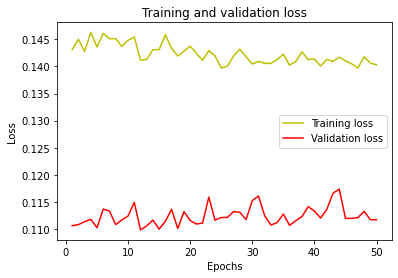

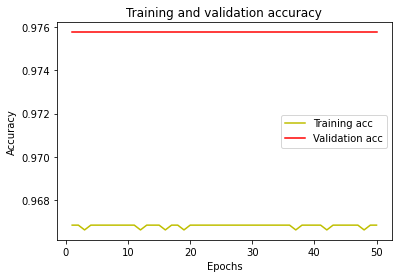

In [24]:
history = model.fit(X_train, y_train ,verbose=1, epochs=50, batch_size=64,
                    validation_data=(X_test, y_test))

_, acc = model.evaluate(X_test, y_test)

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()